<a href="https://colab.research.google.com/github/leviathan519/Swapsy/blob/main/Gabor_filters_and_how_to_use_them_to_generate_features_for_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##############################################
#Gabor filter, multiple filters in one. Generate fiter bank.
'''
For image processing and computer vision, Gabor filters are generally
used in texture analysis, edge detection, feature extraction, etc.
Gabor filters are special classes of bandpass filters, i.e., they allow a certain
‘band’ of frequencies and reject the others.


ksize Size of the filter returned.
sigma Standard deviation of the gaussian envelope.
theta Orientation of the normal to the parallel stripes of a Gabor function.
lambda Wavelength of the sinusoidal factor.
gamma Spatial aspect ratio.
psi Phase offset.
ktype Type of filter coefficients. It can be CV_32F or CV_64F.
indicates the type and range of values that each pixel in the Gabor kernel can hold.
Basically float32 or float64
'''

'\nFor image processing and computer vision, Gabor filters are generally \nused in texture analysis, edge detection, feature extraction, etc. \nGabor filters are special classes of bandpass filters, i.e., they allow a certain \n‘band’ of frequencies and reject the others.\n\n\nksize Size of the filter returned.\nsigma Standard deviation of the gaussian envelope.\ntheta Orientation of the normal to the parallel stripes of a Gabor function.\nlambda Wavelength of the sinusoidal factor.\ngamma Spatial aspect ratio.\npsi Phase offset.\nktype Type of filter coefficients. It can be CV_32F or CV_64F.\nindicates the type and range of values that each pixel in the Gabor kernel can hold.\nBasically float32 or float64\n'

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [14]:
ksize=5#Use size that makes sense to the image and fetaure size. Large may not be good.
#On the synthetic image it is clear how ksize affects imgae (try 5 and 50)
sigma = 5#Large sigma on small features will fully miss the features.
theta = 1*np.pi/4  #/4 shows horizontal 3/4 shows other horizontal. Try other contributions
lamda =1*np.pi/4  #1/4 works best for angled.
gamma = 0.1  #Value of 1 defines spherical. Calue close to 0 has high aspect ratio
#Value of 1, spherical may not be ideal as it picks up features from other regions.
phi = 0.06  #Phase offset. I leave it to 0. (For hidden pic use 0.8)

In [15]:
kernel = cv2.getGaborKernel((ksize,ksize),sigma,theta,lamda,gamma,phi,ktype = cv2.CV_32F)

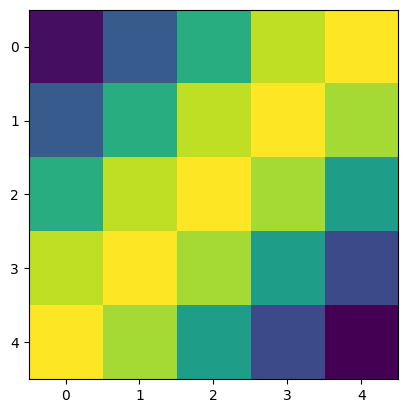

In [16]:
plt.imshow(kernel)

In [23]:
from google.colab import files
files.upload()

Saving download.jfif to download.jfif


{'download.jfif': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x0b\t\t\x07\t\t\x07\t\t\t\t\x0b\t\t\t\t\t\t\x0b\t\x0b\x0b\x0c\x0b\x0b\x0b\x0c\r\x10\x0c\x11\x0e\r\x0e\x0c\x12\x19\x12%\x1a\x1d%\x1d\x19\x1f\x1c))\x16%756\x1a*2>-)0\x19;!\x13\xff\xdb\x00C\x01\x07\x08\x08\x0b\t\x0b\x15\x0b\x0b\x15,\x1d\x19\x1d,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\xff\xc0\x00\x11\x08\x00\xb4\x01\x0c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00@\x10\x00\x02\x02\x00\x05\x02\x04\x04\x04\x04\x03\x06\x06\x03\x00\x00\x01\x02\x03\x11\x00\x04\x12!1\x05A\x13"Qa\x062q\x81\x14#B\x91R\xa1\xc1\xf0\x153\xb1\x07$br\xd1\xe1CS\x82\x92\xa2\xf1\x164\xb2\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xc4\x00%\x11\x00\x02\x02\x02\x03\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x01\x02\x11\x

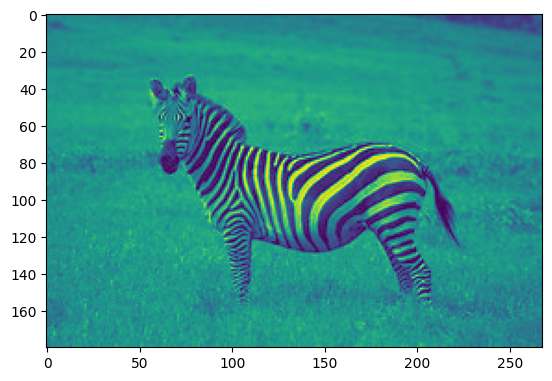

In [33]:
img = cv2.imread("download.jfif",0)
plt.imshow(img)


In [35]:
fimg = cv2.filter2D(img,cv2.CV_8UC3,kernel)

In [37]:
kernel_resized = cv2.resize(kernel,(400,400))

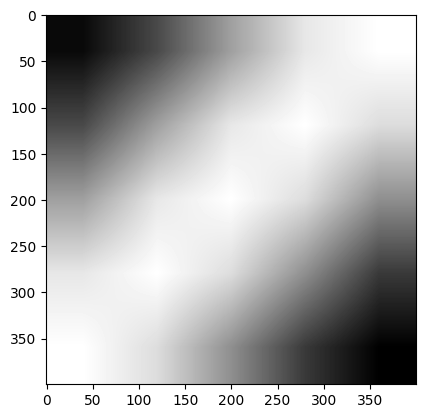

In [38]:
plt.imshow(kernel_resized,cmap='gray')

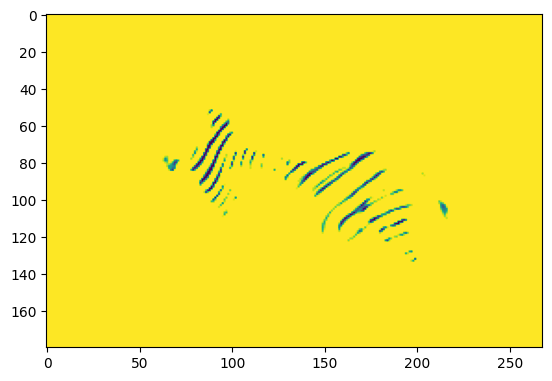

In [39]:
plt.imshow(fimg)

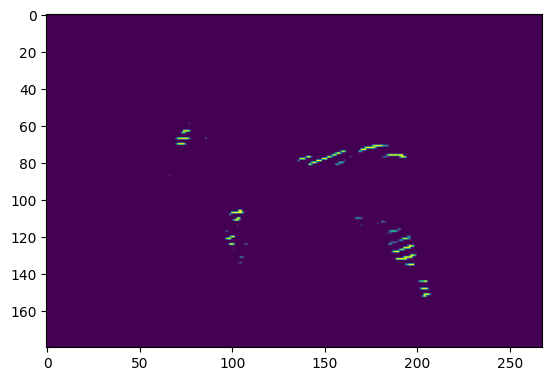

In [41]:
#for 90 degree now,
theta1 = np.pi/2
kernel1 = cv2.getGaborKernel((ksize,ksize),sigma,theta1,lamda,gamma,phi,ktype = cv2.CV_32F)
fimg1 = cv2.filter2D(img,cv2.CV_8UC3,kernel1)
plt.imshow(fimg1)
